In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2
import jaxsp as jsp

In [3]:
from jax.config import config
config.update("jax_enable_x64", True)
plt.style.use("./mnras.mplstyle")
columnwidth = 244.0/72.27
textwidth = 508.0/72.27

/tmp/ipykernel_23970/1258013834.py:1: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


In [4]:
ma = 2e-22
rmax = 10

mass_data = np.loadtxt('../jaxsp/data/leoii.txt')
mass = jsp.MassProfile(mass_data)
potential = jsp.GravPotential(mass)
schrodinger = jsp.Schrodinger(ma, potential)

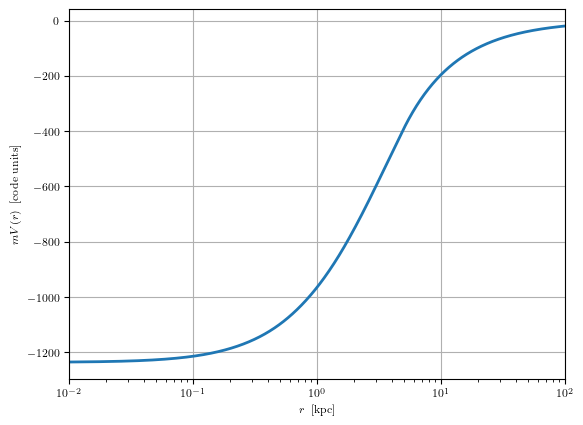

In [5]:
rkpc = jnp.logspace(-2, 2, 1000)
potential = jsp.GravPotential(mass, rpts=1000)
plt.semilogx(rkpc, schrodinger.maV_factor.value*schrodinger.ma*potential(rkpc))
plt.xlabel(r"$r\;\;\mathrm{[kpc]}$")
plt.ylabel(r"$mV(r) \;\;\mathrm{[code\;units]}$")
plt.show()

In [6]:
E_max = (
    ma ** 2
    * potential(jnp.array([rmax]))[0]
    * jsp.mah_factor.value
    * jsp.maV_factor.value
    * jsp.to_kpc_factor.value
)
rmax_lib = 2*rmax
eigenstate_lib = jsp.init_eigenstate_library(potential, ma, E_max, rmax_lib, N=2**13)

In [7]:
r = jnp.logspace(-2, np.log10(rmax_lib), 1000)
evaluate = jax.vmap(jax.vmap(jsp.eval_interp1d, in_axes=(0, None)), in_axes=(None,0))

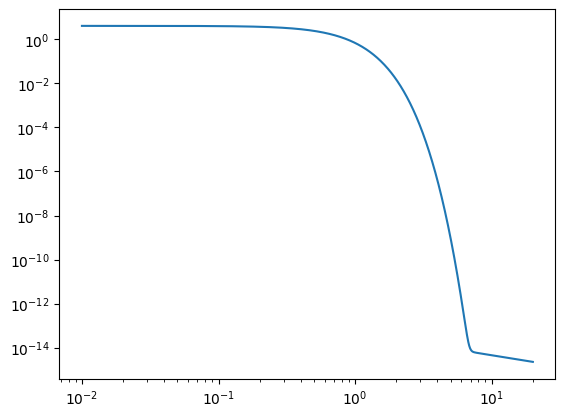

In [13]:
n = 0
l = 0
j = eigenstate_lib.j_of_nl(n,l)
R_j_r = np.abs(evaluate(r, eigenstate_lib.R_j_params))
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.set_yscale("log")
ax.plot(r, R_j_r[j, :])
plt.show()

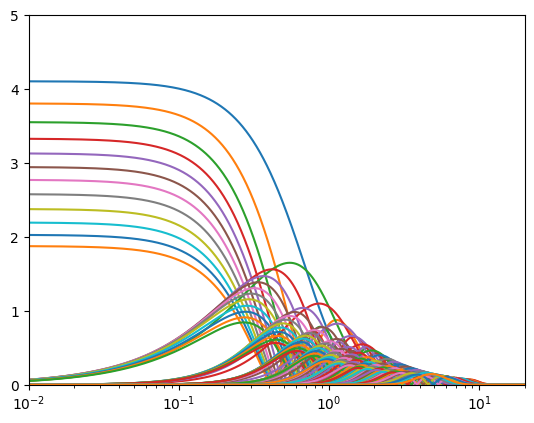

In [17]:
fig, ax = plt.subplots()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.plot(r, R_j_r.T)
ax.set_ylim([0, 5])
ax.set_xlim([r[0], r[-1]])
plt.show()

In [18]:
eigenstate_lib

eigenstate_library(
J=112,
l_of_j=[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  4.  4.  4.  4.  4.  4.  4.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.
  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.  8.  8.  9.  9.  9.  9.  9.  9.
 10. 10. 10. 10. 10. 11. 11. 11. 11. 11. 12. 12. 12. 12. 13. 13. 13. 14.
 14. 15. 15. 16.],
n_of_j=[ 0  1  2  3  4  5  6  7  8  9 10 11  0  1  2  3  4  5  6  7  8  9 10  0
  1  2  3  4  5  6  7  8  9 10  0  1  2  3  4  5  6  7  8  9  0  1  2  3
  4  5  6  7  8  0  1  2  3  4  5  6  7  8  0  1  2  3  4  5  6  7  0  1
  2  3  4  5  6  0  1  2  3  4  5  6  0  1  2  3  4  5  0  1  2  3  4  0
  1  2  3  4  0  1  2  3  0  1  2  0  1  0  1  0])

/tmp/ipykernel_23970/2126943744.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(labels)
/tmp/ipykernel_23970/2126943744.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(labels)
/tmp/ipykernel_23970/2126943744.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(labels)


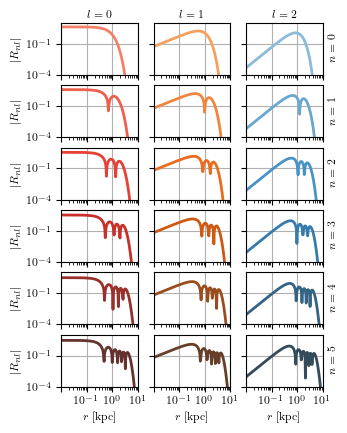

In [17]:
Rmin = 0.01
Rmax = 10
R = np.logspace(np.log10(Rmin), np.log10(Rmax), 200)
fig, ax = plt.subplots(nrows=6, ncols=3, sharex=True, sharey=True,figsize=(columnwidth,1.4*columnwidth))

for a in ax.flatten():
    a.set_yscale("log")
    a.set_xscale("log")
    a.set_ylim([1e-4,10])

ns = np.arange(6)
ls = np.arange(3)
cs = sns.color_palette("Reds_d", 6) + sns.color_palette("Oranges_d", 6) + sns.color_palette("Blues_d", 6)

evaluate = jax.vmap(jax.vmap(jsp.eval_interp1d, in_axes=(0, None)), in_axes=(None,0))
R_j_R = evaluate(R, eigenstate_lib.R_j_params)
for l in ls:
    for n in ns:
        j = eigenstate_lib.j_of_nl(n,l)
        ax[n,l].plot(R, np.abs(R_j_R[j,:]), c=cs[n + l*6])
        
plt.draw()

for a in ax[:,0]:
    a.set_ylabel(r"$|R_{nl}|$")
    
for a in ax[-1,:]:
    labels = a.get_xticklabels()
    labels[1] = ""
    a.set_xticklabels(labels)
    
for a in ax[-1,:]:
    a.set_xlabel(r"$r\; \mathrm{[kpc]}$")
    
for l,a in enumerate(ax[0,:]):
    a.text(0.5, 1.1, rf"$l={l}$", ha="center", transform=a.transAxes)

for n,a in enumerate(ax[:,-1]):
    a.text(1.06, .5, rf"$n={n}$", va="center", transform=a.transAxes, rotation=90)

plt.savefig("../notes/eigenstate_lib/eigenstates.pdf", format="PDF", bbox_inches="tight", pad_inches=0.01)